# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row:

<ol>
    <li>PatientId: Identification of a patient</li>
    <li>AppointmentID: Identification of each appointment</li>
    <li>Gender: Male or Female</li>
    <li>ScheduledDay: This tells us on what day the patient set up their appointment</li>
    <li>AppointmentDay: The day of the actuall appointment, when they have to visit the doctor</li>
    <li>Age: Self explanatory</li>
    <li>Neighbourhood: It indicates the location of the hospital</li>
    <li>Scholarship: It indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família</li>
    <li>Hipertension: </li>
    <li>Diabetes: </li>
    <li>Alcoholism: </li>
    <li>Handcap</li>
    <li>SMS_received: 1 or more SMS sent to the patient</li>
    <li>No-show: Yes(Did not show up) or No (Did show up)</li>

</ol>


### Question(s) for Analysis

**1) In general, do people show up for their scheduled appointment?**

---
**2) Do factors like gender, age, handicap and whether an SMS was sent or not influence the presence of a patient at a scheduled appointment?** 

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
 

For the next parts, I will continue in French, because I'm not that comfortable with English, but I'm keeping on working to improve my english level. :)

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Mettons la colonne 'PatientId' au format entier :

In [5]:
df["PatientId"] = df["PatientId"].astype('int64')
df["PatientId"].dtype

dtype('int64')

Très bien ! Vérifions que 'Gender' contient bien deux valeurs uniquement :

In [6]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

Bien ! Il faudrait maintenant mettre les colonnes 'ScheduledDay' et 'AppointmentDay' au format _datetime_:

In [7]:
df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64[ns]')
df['ScheduledDay'].dtype

dtype('<M8[ns]')

In [8]:
df['AppointmentDay'] = df['AppointmentDay'].astype('datetime64[ns]')
df['AppointmentDay'].dtype

dtype('<M8[ns]')

Très bien; passons à la colonne 'Age', elle est au bon format mais regardons aussi si les valeurs qu'elle contient sont cohérentes en s'intéressant par exemple à l'âge minimal et l'âge maximal :

In [9]:
print(f"Age min : {df.Age.min()} ans")
print(f"Age max : {df.Age.max()} ans")

Age min : -1 ans
Age max : 115 ans


Hmm... Regardons de plus près les lignes dont les patients ont un âge inférieur à 0, combien y en a-t-il ?

In [10]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


Nous trouvons judicieux de supprimer cet élément de notre jeu de données :

In [11]:
df.drop(index=df.query('Age < 0').index, inplace=True)
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Ok, maintenant regardons s'il y a des individus d'âge nul :

In [12]:
# combien il y en a
len(df.query('Age == 0'))

3539

Oui il y en a pas mal de "bébés"; pour vérifier si ce n'est pas dû à une erreur, on va regarder s'il y a des "bébés" alcooliques, ou diabétiques ou hypertendus. Si c'est le cas, nous supprimerons ceux-là, et nous garderons les autres qui seront effectivement considérés comme des nouveaux-nés :

In [13]:
# les 'bébés' qui seraient diabétiques ou alcooliques ou hypertendus
df.query('Age==0 & (Diabetes == 1 | Alcoholism == 1 | Hipertension == 1)')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Il n'y en a pas, nous considérerons donc tous ces individus comme étant des nouveaux-nés. 

'Neighbourhood' ça va...

Pour 'Scholarship' vérifions qu'elle contient deux valeurs :

In [14]:
df['Scholarship'].unique()

array([0, 1])

De même pour 'Hipertension' après l'avoir renommée en 'Hypertension':

In [15]:
df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)
df['Hypertension'].unique()

array([1, 0])

De même pour 'Diabetes' :

In [16]:
df['Diabetes'].unique()

array([0, 1])

Bien, de même pour 'Alcoholism' :

In [17]:
df['Alcoholism'].unique()

array([0, 1])

De même pour 'Handcap' après l'avoir renommée en 'Handicap':

In [18]:
df.rename(columns={'Handcap': 'Handicap'}, inplace=True)
df['Handicap'].unique()

array([0, 1, 2, 3, 4])

C'est bizarre, cette colonne devrait contenir uniquement des 0 ou des 1. 

Regardons la colonne 'SMS_received' qui contient le nombre de SMS de rappel que les clients ont reçu :

In [19]:
df['SMS_received'].unique()

array([0, 1])

Que des 0 ou des 1 ! Il semble donc que les colonnes 'Handicap' et 'SMS_received' aient été permutées, corrigeons cela !

In [20]:
df.rename(columns={"Handicap": 'SMS_received', 'SMS_received': 'Handicap'}, inplace=True)
df['Handicap'].unique()

array([0, 1])

In [21]:
df['SMS_received'].unique()

array([0, 1, 2, 3, 4])

Bien, une dernière chose : la colonne 'No-show' est ambigue ! Créons une nouvelle colonne 'Show' et supprimons 'No-show' :

In [22]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
# Création de Show à partir de No-show en inversant leurs valeurs
df['Show'] = df['No-show'].apply(lambda x: 'Yes' if x=='No' else 'No')
# Suppression de la colonne No-show
df.drop(columns='No-show', inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,Handicap,Show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


Très bien, passons à la phase suivante !

<a id='eda'></a>
## Exploratory Data Analysis

###  1- In general, do people show up for their scheduled appointment?

In [24]:
# Pour avoir les répartitions de la colonne 'Show'
df.groupby('Show')['AppointmentID'].count()

Show
No     22319
Yes    88207
Name: AppointmentID, dtype: int64

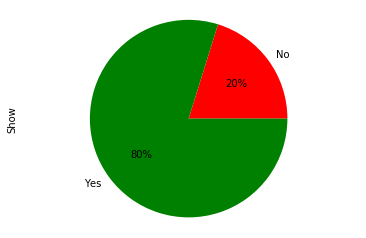

In [37]:
df.groupby('Show')['Show'].count().plot(kind='pie', y="Show", colors=['red', 'green'], autopct='%1.0f%%');
plt.axis('equal');

Nous pouvons donc conclure qu'**en général, les rendez-vous pris sont respectés !**

### 2) Do factors like gender, age, handicap and whether an SMS was sent or not influence the presence of a patient at a scheduled appointment?

Pour chacune de ces caractéristiques, nous utiliserons une fonction pour générer les diagrammes en barre. La voici :

In [26]:
def barplot(df, column, labels):
    counts = df.groupby([column, 'Show']).count()['AppointmentID']
    totals = df.groupby(column).count()['AppointmentID']
    
    n = len(labels)
    # la variable contenant les différentes proportions de la colonne selon ses différentes catégories
    proportions = []
    for i in range(n):
        proportions.append(counts[labels[i]]/totals[labels[i]])
   
    ind = np.arange(n)
    width = 0.3
    distance = n//2
    colors = ['r', 'g', 'b', 'purple', 'y']
    
    for i in range(len(labels)):
        bars_1 = plt.bar((width*i), proportions[i][0], width, color=colors[i], alpha=.7, label=labels[i])
        bars_2 = plt.bar((width*i) + distance, proportions[i][1] , width, color=colors[i], alpha=.7)
    # title and labels
    plt.ylabel('Proportion')
    plt.xlabel('Show Appointment')
    plt.title(f'Proportion by {column} and Appointment')
    locations = ind + width / 2  # xtick locations
    #plt.xticks([(n*width), distance+(n*width)], ['No', 'Yes'])
    plt.xticks([(n//2)*width, distance+(n//2)*width], ['No', 'Yes'])
    # legend
    plt.legend()

#### 2-a) Gender

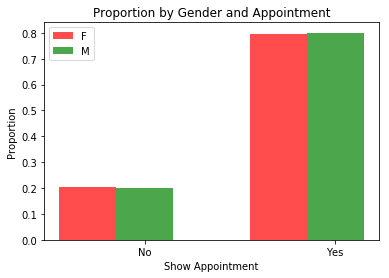

In [27]:
# Affichage des proportions de genre suivant le statut du rendez-vous
barplot(df, 'Gender', ['F', 'M'])

**Conclusion :** À partir du genre d'un patient, **on ne peut pas conclure sur sa présence ou non à un rendez-vous qu'il a pris**, vu que les proportions sont quasiment les mêmes.

#### 2-b) Handicap

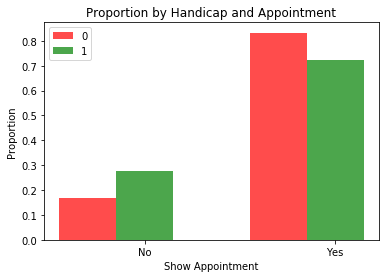

In [28]:
# Affichage des proportions de handicap suivant le statut du rendez-vous
barplot(df, 'Handicap', [0, 1])

**Conclusion :** On peut conclure d'après ce graphique que **les handicapés ont moins de chances d'honorer leur rendez-vous que ceux qui ne le sont pas !**

#### 2-c) Age

Nous allons d'abord créer une nouvelle colonne qui va classer les âges en **5** catégories : 

<ol>
    <li>les moins de 20 ans</li>
    <li>ceux qui ont entre 20 et 40 ans</li>
    <li>ceux qui ont entre 40 et 60 ans</li>
    <li>ceux qui ont entre 60 et 80 ans</li>
    <li>les plus de 80 ans</li>

</ol>

In [29]:
def age_category(x):
    if x <= 20:
        return '<= 20 ans'
    if x <= 40:
        return '<= 40 ans'
    if x <= 60:
        return '<= 60 ans'
    if x <= 80:
        return '<= 80 ans'
    return '> 80 ans'

# Création de la colonne Age_category à l'aide de la fonction nouvellement créée
df['Age_category'] = df['Age'].apply(age_category)

Passons à l'affichage maintenant :

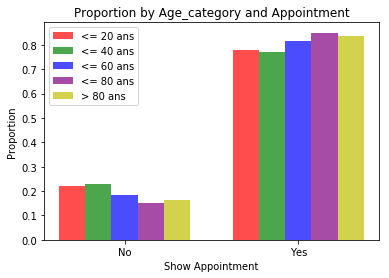

In [30]:
# Affichage des proportions de catégories d'âge suivant le statut du rendez-vous
barplot(df, 'Age_category', ['<= 20 ans', '<= 40 ans', '<= 60 ans', '<= 80 ans', '> 80 ans'])

**Conclusion :** D'après ce graphique (la partie de droite notamment), on peut conclure que **plus l'on est âgé, plus on a tendance à respecter son rendez-vous !**

#### 2-d) Le fait qu'un client ait reçu un SMS de rappel ou non

Pour voir si ce facteur a un effet ou pas, créons une nouvelle colonne pour dit si pour un rendez-vous, un SMS de rappel a été envoyé ou pas :

In [31]:
# Création de la nouvelle colonne qui indiquera si un client a reçu ou non un SMS de rappel
df['Has_received_SMS'] = df['SMS_received'].apply(lambda x: 'Reçu' if x>0 else 'Pas reçu')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,Handicap,Show,Age_category,Has_received_SMS
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,<= 80 ans,Pas reçu
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,<= 60 ans,Pas reçu
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,<= 80 ans,Pas reçu


Bien, passons à l'affichage :

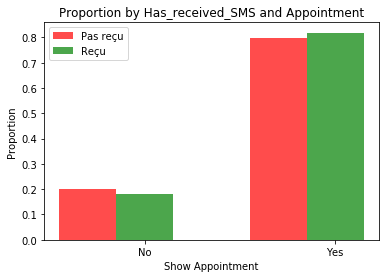

In [32]:
# Affichage des proportions de réception de SMS suivant le statut du rendez-vous
barplot(df, 'Has_received_SMS', ['Pas reçu', 'Reçu'])

**Conclusion** : D'après ce graphique, on peut conclure que **les rendez-vous pour lesquels des SMS de rappel sont envoyés ont un peu plus tendance à être respectés que ceux pour lesquels rien n'est envoyé !**

<a id='conclusions'></a>
## Conclusions

En conclusion, nous pouvons dire qu'en général **les rendez-vous pris sont respectés**, et que **des facteurs comme l'âge, l'envoi de SMS et la présence d'un handicap ont une influence sur le respect d'un rendez-vous.** L'âge et l'envoi de SMS de rappel ont une influence positive tandis que la présence d'un handicap est négatif pour le respect d'un rendez-vous médical.

Une limitation que nous avons pu observer pour ce jeu de données et donc cette étude est la permutation des colonnes 'SMS_received' et 'Handicap' ainsi que leurs valeurs; cela est sûrement due à une erreur d'inattention, d'où l'importance de redoubler de vigilance dans l'acquisition des données, en particulier en rapport avec un domaine aussi sensible que celui de la médécine !

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0